In [4]:
from pathlib import Path
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [7]:
model_path = Path("C:\\Users\\AMET\\DocGaid\\yolov8\\runs\\segment\\300_better_singletooth\\weights\\best.pt")
image_path = Path("C:\\Users\\AMET\\DocGaid\\diploma\\data\\full_teeth\\images\\144.jpg")


0: 480x800 1 11, 1 12, 1 13, 1 14, 1 16, 2 17s, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 28, 2 31s, 1 32, 1 33, 2 34s, 1 35, 1 36, 1 37, 1 41, 1 42, 1 43, 1 44, 2 45s, 1 46, 1 47, 1 48, 192.0ms
Speed: 6.1ms preprocess, 192.0ms inference, 1577.6ms postprocess per image at shape (1, 3, 480, 800)


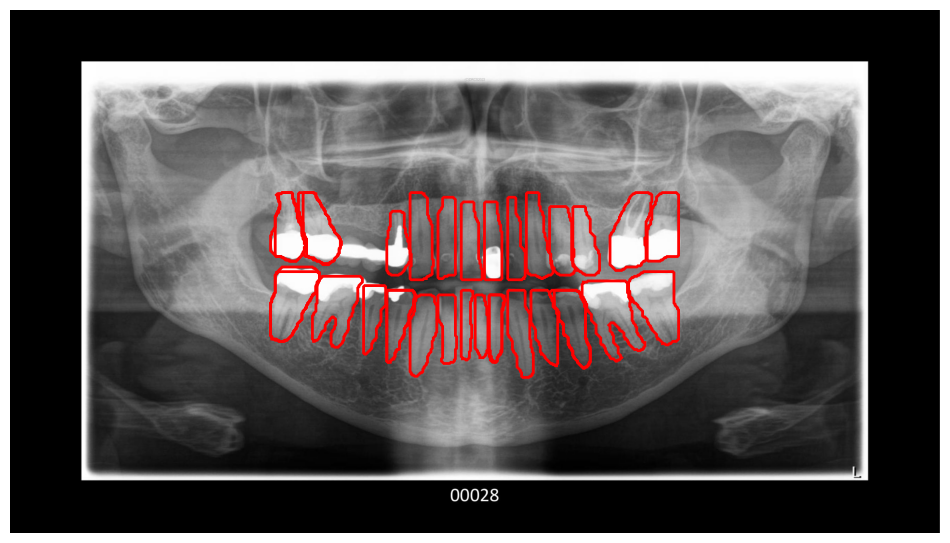

In [8]:
from scipy.interpolate import splprep, splev

model = YOLO(model_path)

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
results = model.predict([image]) 
classes = results[0].boxes.cls
masks = results[0].masks
polygons = masks.xy


fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

for index, poly in enumerate(polygons):
    
    # poly = poly.reshape((-1, 2))  
    # class_polygon = classes[index]
    patch = patches.Polygon(poly, closed=True, fill=True, edgecolor='r', facecolor='none', linewidth=2)
    ax.add_patch(patch)

plt.axis('off')
plt.show()


In [9]:
tooth_dict = {
  0: '11',
  1: '12',
  2: '13',
  3: '14',
  4: '15',
  5: '16',
  6: '17',
  7: '18',
  8: '21',
  9: '22',
  10: '23',
  11: '24',
  12: '25',
  13: '26',
  14: '27',
  15: '28',
  16: '31',
  17: '32',
  18: '33',
  19: '34',
  20: '35',
  21: '36',
  22: '37',
  23: '38',
  24: '41',
  25: '42',
  26: '43',
  27: '44',
  28: '45',
  29: '46',
  30: '47',
  31: '48',
}

In [10]:
from random import randint

In [ ]:
model = YOLO(model_path)
image_root_path = Path("C:\\Users\\AMET\\DocGaid\\diploma\\data\\full_teeth\\images")
save_data = Path("C:\\Users\\AMET\\DocGaid\\yolov8\\data\\model_predictions\\preds")
image_paths = list(image_root_path.glob('*.jpg'))
image_paths = [path for path in image_paths if int(path.stem) >= 234]
for image_path in image_paths:
    # print(image_path)
    # continue
    save_path = (save_data / image_path.stem).with_suffix(".txt")
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    results = model.predict([image]) 
    classes = results[0].boxes.cls.tolist()
    masks = results[0].masks
    if not masks:
        continue
    polygons = masks.xy

    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(image)
    
    for index, poly in enumerate(polygons):
    
        class_polygon = tooth_dict[int(classes[index])]
        centroid_x = np.min(poly[:, 0])
        centroid_y = np.min(poly[:, 1])
        patch = patches.Polygon(poly, closed=True, fill=True, edgecolor='b', facecolor='none', linewidth=2)
        ax.add_patch(patch)
        plt.text(centroid_x, centroid_y, f"{class_polygon}", ha='center', va='bottom', color='yellow')

    plt.savefig(f'{image_path.stem}.jpg', format='jpg', dpi=80)
    plt.show()

In [13]:
import os
import img2pdf

# specify the directory
folder = r"C:\\Users\\AMET\\DocGaid\\yolov8\\data\\model_predictions\\preds"

# get all image files from the directory
images = [i for i in os.listdir(folder) if i.endswith(".jpg") or i.endswith(".png")]

# sort the images by name
images.sort()

# convert each image to pdf
pdf_bytes = img2pdf.convert([os.path.join(folder, i) for i in images])

# write the pdf bytes to a file
with open("tooth_segmentation_300better_single_tooth.pdf", "wb") as f:
    f.write(pdf_bytes)

In [ ]:
model = YOLO(model_path)
image_root_path = Path("C:\\Users\\AMET\\DocGaid\\diploma\\data\\full_teeth\\images")
save_data = Path("C:\\Users\\AMET\\DocGaid\\yolov8\\data\\model_predictions\\preds")
image_paths = list(image_root_path.glob('*.jpg'))
image_paths = [path for path in image_paths if int(path.stem) >= 211]

count = 0

for image_path in image_paths:
    # print(image_path)
    # continue
    save_path = (save_data / image_path.stem).with_suffix(".jpg")
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    results = model.predict([image]) 
    classes = results[0].boxes.cls.tolist()
    masks = results[0].masks
    if not masks:
        continue
    polygons = masks.xy

    # fig, ax = plt.subplots(1, figsize=(12, 9))
    # ax.imshow(image)
    
    
    layer = np.zeros_like(image)

    alpha = 0.5  
    text_labels = []
    for i, poly in enumerate(polygons):
        
        ctr = np.array(poly, dtype=np.int32)
        color = (randint(0, 255), randint(0, 255), randint(0, 255))

        cv2.fillPoly(layer, [ctr], color=color)
        # print([ctr])
        class_polygon = tooth_dict[int(classes[i])]
        centroid_x = np.min(poly[:, 0])
        centroid_y = np.min(poly[:, 1])
        fake_image = cv2.addWeighted(image, alpha, layer, 1-alpha, 0)
        text_labels.append((class_polygon, centroid_x, centroid_y))
        # cv2.putText(fake_image, str(class_polygon), (int(centroid_x), int(centroid_y)),
        #         cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 0), 2, cv2.LINE_AA)
        # plt.text(centroid_x, centroid_y, f"{class_polygon}", ha='center', va='bottom', color='yellow')
    
    for label, x, y in text_labels:
        cv2.putText(fake_image, str(label), (int(x), int(y)),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2, cv2.LINE_AA)
    # Ensure the save directory exists
    
    fig = plt.figure(figsize=(fake_image.shape[1]/80, fake_image.shape[0]/80), dpi=80)  # adjust the figure size based on the original image size
    ax = plt.Axes(fig, [0., 0., 1., 1.], )
    ax.set_axis_off()
    # cv2.imwrite(str(save_path), fake_image)
    fig.add_axes(ax)
    ax.imshow(fake_image)
    plt.savefig(f'{image_path.stem}.jpg',format='jpg', dpi=80)
    plt.show()
    # break
